# EXPLORATORY DATA ANALYSIS


# **Defining the question**

(a) Specifying the question

Research question: Predict which individuals are most likely to have or use a bank account.

Provide an indication of the state of the financial inclusion in kenya, Rwanda, Tanzania and Uganda

Provide insights into some of the key demographic factors that might drive individual's financial outcomes

(b) Defining the Metric for success

To address the question above, these are the objectives I will use:

Exploratory Data Analysis

Univariate, Bivariate and Multivariate analysis

Visualizations

Reduction techniques 

Mutiple Regression model

(c) Understanding the context

Variable Definitions / Data Dictionary: http://bit.ly/VariableDefinitions 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. 

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

(d) Recording the experimental design taken

To successfully conduct this project the following steps will be taken in order:

Conduct Exploratory Data Analysis

Univariate, Bivariate and Multivariate analysis

Create Visualizations

Apply Reduction techniques 

Create a Mutiple Regression model for predictions challenging the solution to find our if its the best for this for this particular scenario.

(e) Data Relevance

The data provided fits the context of our study. It contains crucial variables that can be used for our prediction.

The main dataset contains demographic information and what financial services are used by individuals across East Africa.

This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016

Finscope Tanzania 2017:  http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/

Dataset Files:

Variable Definitions: http://bit.ly/VariableDefinitions 

Dataset: http://bit.ly/FinancialDataset

# **Reading the Dataset**

In [8]:
#To avoid printing out warnings
import warnings

warnings.filterwarnings('ignore')

In [9]:
#Importing the libraries we will need
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

from pandas_profiling import ProfileReport

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
#Loading and previewing our dataset
df=pd.read_csv('http://bit.ly/FinancialDataset')


# Checking the data

In [10]:
#preview the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
#preview the bottom of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [12]:
#Checking whether each column has appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [13]:
#Checking the dataset information
df.info

<bound method DataFrame.info of       country  year       uniqueid Has a Bank account Type of Location  \
0       Kenya  2018     uniqueid_1                Yes            Rural   
1       Kenya  2018     uniqueid_2                 No            Rural   
2       Kenya  2018     uniqueid_3                Yes            Urban   
3       Kenya  2018     uniqueid_4                 No            Rural   
4       Kenya  2018     uniqueid_5                 No            Urban   
...       ...   ...            ...                ...              ...   
23519  Uganda  2018  uniqueid_2113                 No            Rural   
23520  Uganda  2018  uniqueid_2114                 No            Rural   
23521  Uganda  2018  uniqueid_2115                 No            Rural   
23522  Uganda  2018  uniqueid_2116                 No            Urban   
23523  Uganda  2018  uniqueid_2117                 No            Rural   

      Cell Phone Access  household_size  Respondent Age gender_of_respondent  \

In [14]:
#Checking the numeric features of the dataset
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [15]:
#Checking the shape of the dataset(rows and columns)
print('This dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

This dataset has 23524 rows and 13 columns


In [16]:
#checking the columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# **Tidying the Dataset**


# Missing Values

In [17]:
#Checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [18]:
#Dropping all null values in our columns
df.dropna(inplace=True)

In [19]:
#Dropping unnecessary columns
df.drop(['uniqueid'], axis=1, inplace=True)

In [20]:
#Confirming that there are no null values
df.isnull().sum()


country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

Handling Messy columns

In [21]:
#checking and renaming column names

df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [22]:
# Removing the spaces and setting all column names to lower case

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [23]:
df.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)
df.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)

In [24]:
#confirming the column names
df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

# Outliers

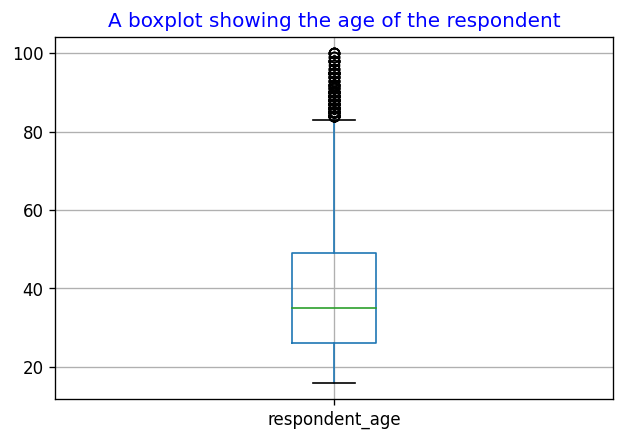

In [25]:
#Checking for outliers on the respondent_age
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 120)
df.boxplot(['respondent_age'])
plt.title("A boxplot showing the age of the respondent", color = 'blue')
plt.show()

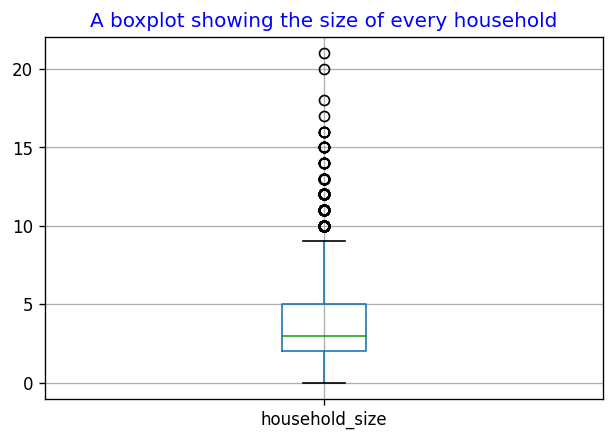

In [26]:
#Checking for outliers on the household_size variable
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart
plt.figure(dpi = 120)
df.boxplot(['household_size'])
plt.title("A boxplot showing the size of every household", color = 'blue')
plt.show()

# Anomalies

In [59]:
# The data description of the year column (Year survey was done in) only included(2016,2017,2018)
# Removing the anomalies on the year column

indexnames = df[df['year'] > 2018].index

df.drop(indexnames, inplace = True)

In [60]:
# checking that there are no anomalies in the year column

df.year.unique()

array([2018, 2016, 2017])

# **EXPLORATORY DATA ANALYSIS**

# UNIVARIATE

# Visualization

1. Piecharts

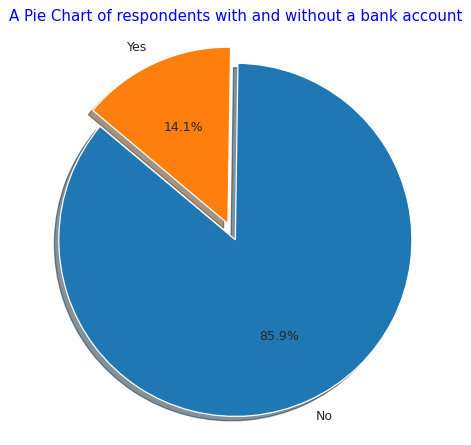

In [61]:
# A pie chart of the respondents who has or had no bank account

# grouping the data to be plotted

bank = df['has_a_bank_account'].value_counts()
bank

# accessing the data to plot

# labels
sizes= bank.index
sizes

# values
data = bank.values
data

# plotting the pie chart

plt.figure(figsize = (6,6), dpi = 90)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0,0.1), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'blue')
plt.show()



The pie chart shows only a few respondents (14.1%) had a bank account.

The majority (85.9%) did not have a bank account.

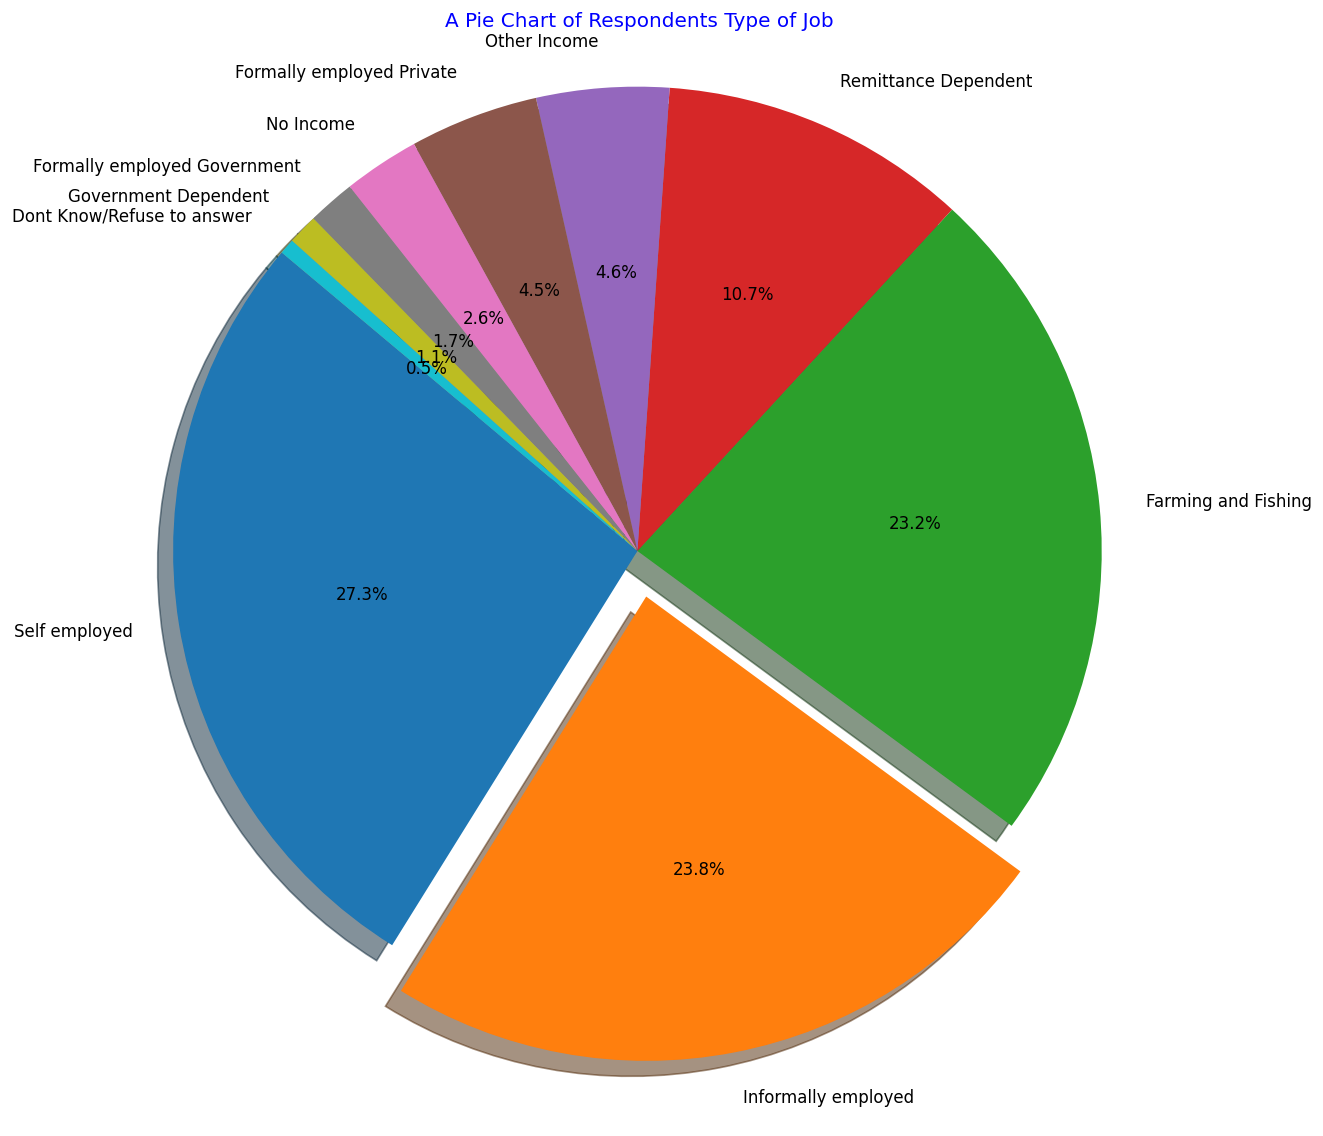

In [30]:
# A pie chart of the respondents type of job

# grouping the data to be plotted

job = df.type_of_job.value_counts()
job

# accessing the data to plot

# labels
sizes3= job.index
sizes3

# values
data3 = job.values
data3

# plotting the pie chart

plt.figure(figsize = (12,12), dpi = 120)
plt.pie(data3, labels = sizes3, autopct = '%1.1f%%', shadow = True, explode = (0,0.1,0,0,0,0,0,0,0,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of Respondents Type of Job', color = 'blue')
plt.show()


The pie chart shows that the top 3 were self employed, informed employed, and practicing farming and fishing.

The majority (85.9%) did not have a bank account

2. Bar Charts

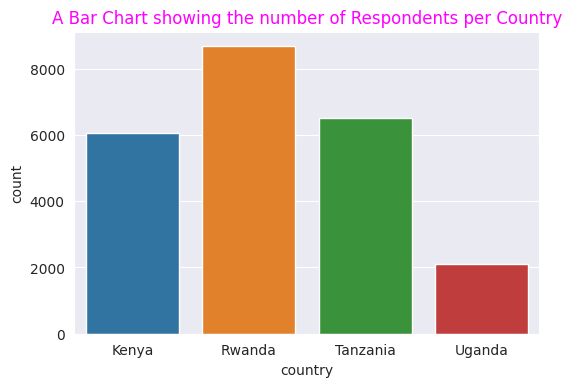

In [31]:
# Plotting a bar plot of the respondent country 

# Using seaborn to create a bar chart
# specifying our chart size

plt.figure(dpi = 100)

sns.set_style('darkgrid')
sns.countplot(df.country)

# Giving a title to our chart
plt.title('A Bar Chart showing the number of Respondents per Country', color = 'magenta')

# Displaying our chart
plt.show()


The least number of respondents were from Uganda.

The number of respondents by country were not equal.

The bar chart shows that most respondents were from Rwanda. 

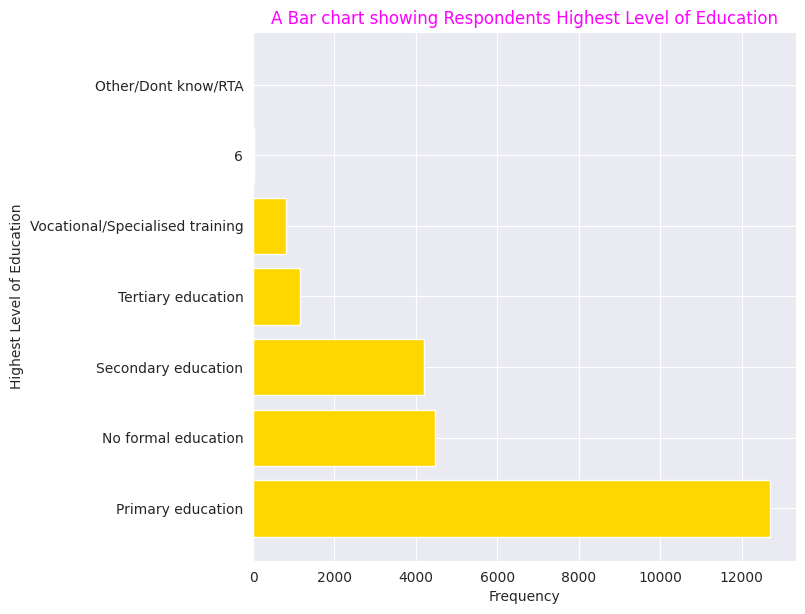

In [32]:
# # Plotting a horizontal bar plot of the respondent highest level of education 



# grouping the data to be plotted

Education = df.level_of_education.value_counts()
Education

# accessing the data to plot

# labels
sizes2= Education.index
sizes2

# values
data2 = Education.values
data2

# Using matplotlib to create a bar chart
# specifying our chart size
plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes2, data2, color = 'gold')

# labeling the y axis
plt.ylabel("Highest Level of Education")

# labeling the x axis
plt.xlabel('Frequency')

# Giving a title to our chart
plt.title("A Bar chart showing Respondents Highest Level of Education", color = 'magenta')

# Displaying our chart
plt.show()

Most respondents' highest level of education was the primary school.

There are other categories with the least number (others and 6) and the 6 category seems to be an anomaly.

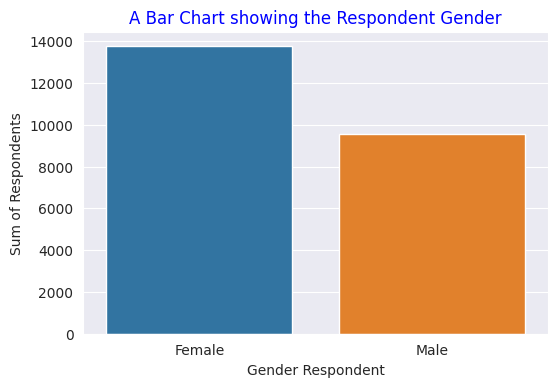

In [33]:
# Plotting a bar plot of the respondent gender 

# Using seaborn to create a bar chart
# specifying our chart size

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.gender_of_respondent)

#labelling the axis
plt.xlabel('Gender Respondent')
plt.ylabel('Sum of Respondents')

# Giving a title to our chart
plt.title('A Bar Chart showing the Respondent Gender', color = 'Blue')

# Displaying our chart
plt.show()

The bar chart shows that there were more female respondents than male respondents 

3. Histograms

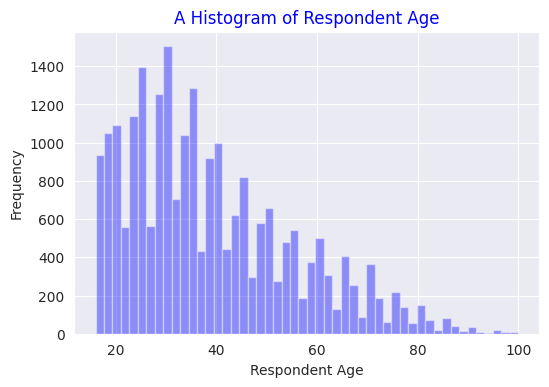

In [34]:
#Create an histogram of respondent age

# Using seaborn to create a histogram
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.distplot(df['respondent_age'], kde =False, color = 'blue')  

# labeling the axis
plt.ylabel('Frequency')
plt.xlabel('Respondent Age')

# Giving a title to our chart
plt.title('A Histogram of Respondent Age', color = 'blue')

# Displaying our chart
plt.show()


The histogram shows us that the age distribution is skewed to the right. This is because the tail is long to the right side.

In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,and the mean is less than the mode. This situation is also called negative skewness.

When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side,and the mean is greater than the mode. This situation is also called positive skewness.
This can be seen more evidently if we use (kde=True)

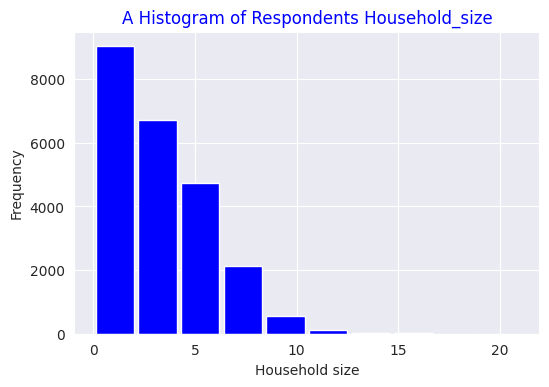

In [35]:
#Creating an histogram of respondent household_size
	 

# Using matplotlib to create a histogram

plt.figure(dpi = 100)
plt.hist(df['household_size'], bins = 10, histtype = 'bar', rwidth = 0.9, color = 'blue')
# labeling the x axis
plt.xlabel('Household size')

# labeling the y axis
plt.ylabel('Frequency')
# Giving a title to our chart
plt.title('A Histogram of Respondents Household_size', color = 'blue')
# Displaying our chart
plt.show()


From the histogram, we can see that the household size distribution is skewed to the right. This is because the tail is long to the right side

4. Frequency Tables

In [36]:
# Create a frequency table to display type of locations categories and their value counts


# Make a crosstab and name the count column

location = pd.crosstab(index = df['type_of_location'], columns = 'count')
location


col_0,count
type_of_location,
Rural,14263
Urban,9077


Respondents from the rural areas are 14263 while the urban are 9077. It is clear that most respondents were from the rural areas

In [37]:
# Frequency table for cell_phone_access categories and their value counts


# Make a crosstab and the count column

cellphone = pd.crosstab(index = df['cell_phone_access'], columns = 'count')
cellphone



col_0,count
cell_phone_access,
No,6009
Yes,17331


Respondents with access to cellphones are 17,331 as compared to 6,009 without. Therefore, most respondents had access to a cell phone 

In [38]:
# We also need to create a frequency table to determine the interviewee relationship_with_head of the house categories and their value counts


# Make a crosstab
# Name the count column

relationship = pd.crosstab(index = df['the_relationship_with_head'], columns = 'count')
relationship


col_0,count
the_relationship_with_head,
Child,2221
Head of Household,12729
Other non-relatives,189
Other relative,662
Parent,1069
Spouse,6470



From the output, we can see that majority of the respondents were the head of the household (12,729), followed by the spouse (6,470). While the least constituted other non-relatives(189).

In [39]:
# Create a Frequency table for interviewee martial status categories and their value counts

# Making a crosstab and naming the value__count column

marital_status = pd.crosstab(index = df['marital_status'], columns = 'count')
marital_status


col_0,count
marital_status,
Divorced/Seperated,2049
Dont know,8
Married/Living together,10698
Single/Never Married,7902
Widowed,2683


As from the results, majority of the respondents were married and living together with their spouses (10,698) folowed by single/never married (7,902), while the least constituted of people did not know their marital status (8).

# Measures of Central Tendency

Mean

In [40]:
# Compute the mean of the respondent household_size

df.household_size.mean()


3.688560411311054

In [41]:
# Compute the mean of the respondent respondent_age

df.respondent_age.mean()


38.80706940874036

Median

In [42]:
# Arranging the data in ascending /descending order, compute the median of the respondent household_size

df.household_size.median()


3.0

In [43]:
#As done for the household_size, compute the median of the respondent_age
df.respondent_age.median()

35.0

Mode

In [44]:
# mode is most appearing/occuring in a data, compute the mode of the respondent household_size

df.household_size.mode()


0    2.0
dtype: float64

In [45]:
# mode of the respondent_age

df.respondent_age.mode()


0    30.0
dtype: float64

# Measures of Dispersion/Variability

 RANGE

Difference between minimum and maximum value

find maximum value 

find minimum value

Range = max - min

In [46]:
# Range of the household_size

household_Max = df.household_size.max()
print(household_Max)

household_Min = df.household_size.min()
print(household_Min)

household_Range = household_Max - household_Min
household_Range




21.0
0.0


21.0

In [47]:
# Range of the respondent_age

Age_Max = df.respondent_age.max()
print(Age_Max)

Age_Min = df.respondent_age.min()
print(Age_Min)

Age_Range = Age_Max - Age_Min
Age_Range

100.0
16.0


84.0

VARIANCE 

It is a measure of how dispersed or spread out the set is, if a data set has a variance of zero, then every member of it is the same.

If the variance is high, especially as a ratio to the mean, then the data have some very large dis-similarities amongst its members.

It is the square of average distance between each observation and mean i.e. square of standard deviation. 


In [48]:
#computing the variance of the household_size

df.household_size.var()

5.204213789358675

Household_size variance of 5.2 is a small variance compared to the mean of 3.7 hence the dataset does have few anomalies amongst its members

In [49]:
#variance of respondent_age
df.respondent_age.var()

272.90724682066417

The variance of 272.9 is very large compared to the mean of 38.8. This indicates that age distribution among respondents has large differences

STANDARD DEVIATION

This is the average distance between each obseravtion from the mean i.e., how data is spread out from mean. 

A low standard deviation indicates that the data points tend to be close to the mean of the data set. 

While a high standard deviation indicates that the data points are spread out over a wider range of values.

In [50]:
#Standard Deviation of household_size
df.household_size.std()

2.2812745975350435

2.3 is a low standard deviation hence the data points are close to the mean (3.7) of the dataset

In [51]:
#Respondent_age standard deviation
df.respondent_age.std()

16.519904564514412

16.5 is a high standard deviation showing that the data points of respondents age are spread out over a wide range of values

QUARTILES

Quartiles are values that divide the data into quarters when data is sorted in an ascending order. 

It involves three quartile values. 

Q1: First quartile is the 25 percentile. 

Q2: Second quartile is the 50 percentile (median of the data)

Q3: Third quartile is the 75 percentile.

The Interquartile Range(IQR) = Q3 -Q1

In [52]:
# Quantiles of the household_size

df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [53]:
# Quantiles of the respondent_age

df["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

SKEWNESS 

This is a measure of the asymmetry of the probability distribution of a real-valued random variable as per its mean. 

In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

A negative value means the distribution is negatively skewed (skewed to the left).

A positive value means the distribution is positively skewed (skewed to the right).

In [54]:
#Skewness of the household_size

df.household_size.skew()


0.9741827150450616


The household size distribution is skewed to the right since its skewness is a positive value. This was also seen in the histogram above on visualizations with the long right tail.


In [55]:
# Skewness of the respondent_age


df.respondent_age.skew()


0.8406145812311228

The age distribution is skewed to the right since its skewness is a positive value. This was also seen in the age histogram above on visualizations where the long tail was on the right handside.

KURTOSIS 

This is a measure of whether the data are heavy-tailed (profusion of outliers) or light-tailed (lack of outliers) relative to a normal distribution.

If the kurtosis is close to 0, then a normal distribution is often assumed. These are called mesokurtic distributions.                        

If the kurtosis is less than zero, then the distribution has light tails called a platykurtic distribution.  


If the kurtosis is greater than zero, then the distribution has heavier tails called a leptokurtic distribution.

In [56]:
# Kurtosis of the household_size

df.household_size.kurt()


1.1538357462528523

The household_size kurtosis is greater than zero hence the distribution has heavier tail. This is called a leptokurtic distribution

In [57]:
# Kurtosis of the respondent_age

df.respondent_age.kurt()



0.09826807013177241

This kurtosis is close to 0, hence a normal distribution is assumed. This is called mesokurtic distribution

## BIVARIATE

This involves analysis of two different variables

# Visualization

1. Scatter Plots

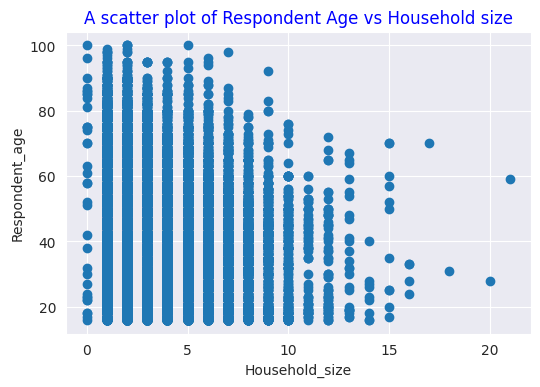

In [62]:
# Using Matplotlib: Plot a scatterplot to compare two numerical the variables

# Specify the chart size

plt.figure(dpi = 100)

# plot the scatterplot using matplotlib
plt.scatter(df['household_size'], df['respondent_age'])

# the scatterplot a title
plt.title('A scatter plot of Respondent Age vs Household size', color = 'blue')

# Label the x axis
plt.xlabel('Household_size')

# Label the y axis
plt.ylabel('Respondent_age')

# We then display our scatterplot 
plt.show()


There is no correlation between the respondent age and household size in the dataset as the points are scattered throughout the graph.

2. Line Charts

In [63]:
# Selecting a few observations in each column to plot a line graph
# There are too many observations to plot all
# using the iloc to select 50 rows  
# then previewing the selection

Data = df.iloc[0:50,-7:-5] 
Data.head()

,household_size,respondent_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


In [ ]:
# Line chart for the respondent age and household size for the first 50 rows only

# creating a line chart using matplotlib, specify the figure size 

plt.figure(figsize = (10,10), dpi = 100)
plt.plot(Data[['respondent_age', 'household_size']])

# plot the x axis ticks (rotation angle)
plt.xticks(rotation = 45)

# label the title
plt.title('A Line Chart of Respondent age and Household size', color = 'blue')

# label the x and y axis

plt.xlabel('Respondent Age')
plt.ylabel('Household Size')

# Displaying our chart
plt.show()

3. Correlation

It is a statistical measure that describes the association between random variables.

Calculating the pearson correlation coefficient is the most widely used correlation coefficient.

Positive correlation is a relationship between two variables in which both variables move in tandem i.e. in the same direction.

Negative correlation is a relationship between two variables whereby they move in opposite directions. 

Correlation coefficients between -.20 and .20 are generally considered weak, between .20 and .50 (positive or negative) are considered moderate, and above.50 (positive or negative) are considered strong. 


In [64]:
# The Pearson Correlation Co-efficient

Pearson_corr= df["respondent_age"].corr(df["household_size"], method="pearson") 
print(Pearson_corr)

# We do not need to define the pearson as it calculates by default

Pearson= df["respondent_age"].corr(df["household_size"]) 
print(Pearson)


-0.11967115234154871
-0.11967115234154871


From the results, the correlation coefficent of Age and Household is approximately -0.12. This means that the Respondents Age and Household size have a very weak negative correlation

In [65]:
#calculate the correlation of the entire dataframe to analyze the relationship of the variables
df.corr()

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


Heatmap

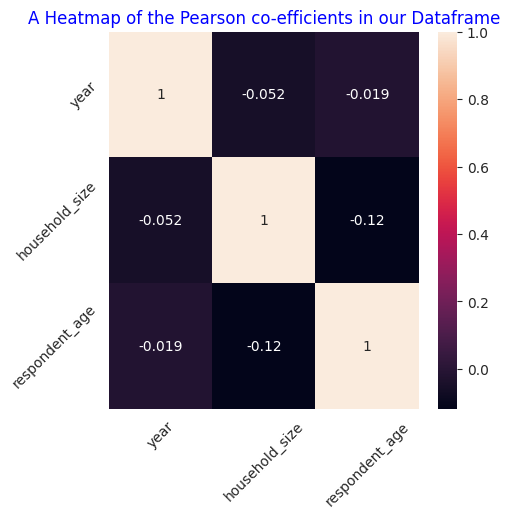

In [66]:
# defining our data

x = df.corr()
# specify the figure size

plt.figure(figsize = (5,5), dpi = 100)
# using the Seaborn library
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)

# Rotating our x and y axis ticks

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

# labelling the title

plt.title('A Heatmap of the Pearson co-efficients in our Dataframe', color = "blue")

# displaying our chart

plt.show()
  

# MULTIVARIATE

This involves analysis of more than 2 different variables at the same time

To analyse multiple categorical variables, we turn them into dummies (zeros and ones)

Pandas has a function which can turn a categorical variable into a series of zeros and ones. This makes them a lot easier to quantify and compare.

In [67]:
# Converting the categories into dummy variables with ones and zeros

# pd.get_dummies creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(df[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# Since we have created a whole new dataframe,in order to compare it to our original dataframe,
# we are going to need to either merge or concatenate them to work with them properly.

# The dummy variables will be on the right side of our dataframe 
# As they are columns, I concatenate them on axis=1, using the concat()

dff = pd.concat([df, dummy], axis = 1)
dff.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,...,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,...,0,0,0,0,0,1,0,0,0,0



# Reduction Techniques

Since we now have a bunch of variables. To visualize patterns much better, we can reduce our bunch of variables into 2 or 3 significant ones without losing the essence of the data collected.

1. Principal Component Analysis (PCA)



PCA is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.

Principal components do not have any correlation with each other. PCA can only be applied to numeric data.

Therefore, categorical features are required to be converted into numerical features before PCA can be applied (already done in the dummies above).

Preprocessing steps

In [69]:
# Step 1
# The first preprocessing step is to divide the dataset into a feature set: 
# X, and corresponding label: y.

X = dff.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = dff['has_a_bank_account']

In [70]:
X.head(5)

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
y.head(2)

0    Yes
1     No
Name: has_a_bank_account, dtype: object

In [72]:
# Step 2
# Splitting the dataset into the training set and test set


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [73]:
# Step 3: Normalization
# PCA performs best with a normalized feature set(X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [74]:
# Step 4: Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA(0.85)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [75]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10153005, 0.07592334, 0.06680469, 0.05968309, 0.05310153,
       0.04452412, 0.04236606, 0.03753098, 0.03662307, 0.03403557,
       0.03095903, 0.02901555, 0.02844533, 0.02807928, 0.02612387,
       0.02588803, 0.0258336 , 0.02555692, 0.02529738, 0.02451124,
       0.02420081, 0.02311547])

In [76]:
# step 6: Using 2 Principal components
# Using the 2 Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [77]:
# step 7
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)


In [78]:
# step 8
# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3911  125]
 [ 632    0]]
Accuracy 0.8378320479862896


From the output we see that with only one feature, the random forest algorithm is able to correctly predict 4041 out of 4668 instances, resulting in 83.78% accuracy.

2. Linear Discriminant Analysis (LDA)

This is a simple but a very powerful linear transformation, most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. 

The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

In [79]:
# Step 1
# Divide dataset into features (z) and corresponding labels (s)
# then divide the resultant dataset into training and test sets. 

z = dff.iloc[:, 12:].values
s = dff.iloc[:, 2].values

The following code divides data into labels and feature set. The code assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.


In [80]:
z

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [81]:
s

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [82]:
# Step 2 
# Divide data into training and test sets
#
from sklearn.model_selection import train_test_split

z_train, z_test, s_train, s_test = train_test_split(z, s, test_size=0.2, random_state=0)

In [83]:
# step 3
# Performing feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z_train = sc.fit_transform(z_train)
z_test = sc.transform(z_test)

In [84]:
# step 4
# Performing LDA with Scikit-Learn. 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
z_train = lda.fit_transform(z_train, s_train)
z_test = lda.transform(z_test)

 
# The n_components parameter of the LDA, refers to the number of linear discriminates that we want to retrieve. 
# We fit and transform methods to retrieve the linear discriminants.
# Incase of LDA, the transform method takes two parameters: the z_train and the s_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

ValueError: ignored

In [85]:
# step 5
# Training and Making Predictions
# Using random forest classifier to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(z_train, s_train)

# # predicting the Test set results

s_pred = classifier1.predict(z_test)

In [86]:
# step 6
# Evaluating the Performance of the algorithm
# Using a confusion matrix and the accuracy score.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(s_test, s_pred)
print(cm1)
print('Accuracy' + str(accuracy_score(s_test, s_pred)))

# With 24 linear discriminants, the algorithm achieved an accuracy of 86.46%, 
# which is a little bit higher than the accuracy achieved with 2 principal component, which was 83.57%.

[[4036    0]
 [ 632    0]]
Accuracy0.8646101113967438


# Multiple Regression Analysis

Linear Regression is a way of predicting a response Y on the basis of a single predictor variable X. It is assumed that there is approximately a linear relationship between X and Y.

Mathematically, this relationship is represented as: Y ≈ ɒ + ß X + ℇ where ɒ and ß are two unknown constants that represent intercept and slope terms in the linear model and ℇ is the error in the estimation.

Linear Regression:
          
          Fast and easy to model
          
          very sensitive to outliers.
          
          less complex with less data
          
          easy to understand and interpret

In [88]:
# libraries we need in addition to others earlier imported
        
from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [89]:
# Binary encoding our Target variable
# since it has two categories (yes/no)

dff['bank'] = dff['has_a_bank_account'].map( {'Yes':1, 'No':0} )
dff[['bank', 'has_a_bank_account']]


,bank,has_a_bank_account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
...,...,...
23519,0,No
23520,0,No
23521,0,No
23522,0,No


In [90]:
# Confirming that we have no anomalies and null values in the new column created
#

dff.bank.unique()

dff.isnull().sum()

country                                               0
year                                                  0
has_a_bank_account                                    0
type_of_location                                      0
cell_phone_access                                     0
household_size                                        0
respondent_age                                        0
gender_of_respondent                                  0
the_relationship_with_head                            0
marital_status                                        0
level_of_education                                    0
type_of_job                                           0
country_Kenya                                         0
country_Rwanda                                        0
country_Tanzania                                      0
country_Uganda                                        0
type_of_location_Rural                                0
type_of_location_Urban                          

In [91]:
# Describing our data

dff.info()
dff.describe()
dff.columns

# has_a_bank_account is the dependent variable and the last 34 columns are the independent variables, 
# here we are predicting which individuals are most likely to have or use a bank account. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             23340 non-null  object 
 1   year                                                23340 non-null  int64  
 2   has_a_bank_account                                  23340 non-null  object 
 3   type_of_location                                    23340 non-null  object 
 4   cell_phone_access                                   23340 non-null  object 
 5   household_size                                      23340 non-null  float64
 6   respondent_age                                      23340 non-null  float64
 7   gender_of_respondent                                23340 non-null  object 
 8   the_relationship_with_head                          23340 non-null  object 


Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job', 'country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
  

In [116]:
# PAIRPLOT

# Creating a pairplot to build histograms and scatter plots.
# using seaborn visualization library


sns.pairplot(dff)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5ae43e78c0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5ae43ee3b0> (for post_execute):


KeyboardInterrupt: ignored

The histogram on the diagonal allows us to see the distribution of a single variable Whereas the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [94]:
# Correlation between the variables in the dataset.
# The correlation coefficient, is an index that ranges from -1 to 1. 
# Values near zero indicate that there is no linear relationship. 
# As the correlation gets closer to plus or minus one, the relationship is stronger. 
# A value of one (or negative one) indicates a perfect linear relationship between two variables.


dff.corr()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,...,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed,bank
year,1.000000,-0.052484,-0.018554,0.713300,-0.886023,0.016489,0.378159,-0.214621,0.214621,0.066637,...,-0.249458,0.055667,0.093995,-0.006624,-0.155148,0.081375,0.101320,0.095562,0.181242,0.112622
household_size,-0.052484,1.000000,-0.119671,0.077525,0.267970,-0.478472,0.178294,0.274154,-0.274154,-0.098177,...,0.186819,0.002535,-0.071401,-0.046451,0.013464,-0.064869,0.062435,0.009102,-0.163152,-0.023056
respondent_age,-0.018554,-0.119671,1.000000,0.029294,0.021959,-0.012208,-0.062924,0.047614,-0.047614,0.103969,...,0.153864,-0.005603,-0.062173,0.172067,-0.088874,-0.059476,-0.014318,-0.059127,-0.000039,0.019601
country_Kenya,0.713300,0.077525,0.029294,1.000000,-0.455904,-0.367999,-0.186005,-0.032965,0.032965,-0.062058,...,0.045759,0.121626,0.067535,0.000809,-0.005100,-0.097686,-0.058555,0.168991,-0.153199,0.186010
country_Rwanda,-0.886023,0.267970,0.021959,-0.455904,1.000000,-0.478187,-0.241700,0.388180,-0.388180,-0.153771,...,0.377594,-0.011538,-0.097856,-0.000771,0.164217,-0.126936,-0.032816,-0.079008,-0.351659,-0.058337
country_Tanzania,0.016489,-0.478472,-0.012208,-0.367999,-0.478187,1.000000,-0.195096,-0.430581,0.430581,0.205389,...,-0.341760,-0.080566,0.032978,0.014210,-0.060252,0.119596,-0.121157,-0.010635,0.415051,-0.087529
country_Uganda,0.378159,0.178294,-0.062924,-0.186005,-0.241700,-0.195096,1.000000,0.069412,-0.069412,0.033127,...,-0.172742,-0.040722,0.010153,-0.022223,-0.175376,0.176944,0.335319,-0.108959,0.178766,-0.049434
type_of_location_Rural,-0.214621,0.274154,0.047614,-0.032965,0.388180,-0.430581,0.069412,1.000000,-1.000000,-0.083635,...,0.346640,-0.047470,-0.069131,0.001769,0.070198,-0.044700,-0.011374,-0.054383,-0.294924,-0.088626
type_of_location_Urban,0.214621,-0.274154,-0.047614,0.032965,-0.388180,0.430581,-0.069412,-1.000000,1.000000,0.083635,...,-0.346640,0.047470,0.069131,-0.001769,-0.070198,0.044700,0.011374,0.054383,0.294924,0.088626
cell_phone_access_No,0.066637,-0.098177,0.103969,-0.062058,-0.153771,0.205389,0.033127,-0.083635,0.083635,1.000000,...,-0.111129,-0.071748,-0.105358,0.058807,0.008835,0.104302,0.006876,0.083630,0.054211,-0.209512


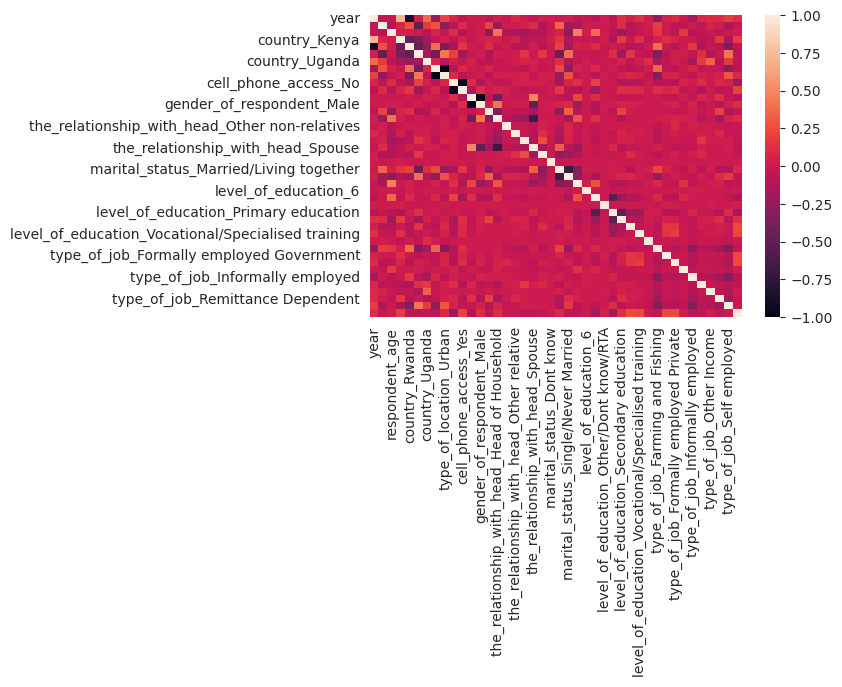

In [95]:
# Heatmap
# Plots the correlation.
# The darker shade shows that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.

plt.figure(dpi = 100)
sns.heatmap(dff.corr())

In [96]:
# Training our regression model
# First split up our data into an X array that contains the features to train on, 
# and a y array with the target variable.

X = dff[['year','country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_of_job_Dont Know/Refuse to answer',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'type_of_job_Formally employed Private',
       'type_of_job_Government Dependent', 'type_of_job_Informally employed',
       'type_of_job_No Income', 'type_of_job_Other Income',
       'type_of_job_Remittance Dependent', 'type_of_job_Self employed']]
y = dff['bank']

In [97]:
X.head(2)

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,...,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [98]:
y.head(2)

0    1
1    0
Name: bank, dtype: int64

In [99]:
# The main aim is to create a model that generalises well to new data.
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data
# 60% remains in the training set.
# And finally we test that algorithm on the test data. 


# First we split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [100]:
# Importing Linear Regression model from sklearn


from sklearn.linear_model import LinearRegression


In [101]:
# Then we create and train the model by fitting the linear regression model on the training data.

lm = LinearRegression()

results = lm.fit(X_train,y_train)

In [102]:
# Grabbing predictions off the test set and see how well it did

predictions = lm.predict(X_test)


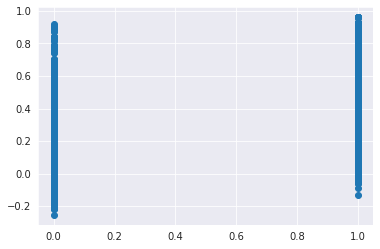

In [103]:
# visualising the prediction

plt.scatter(y_test, predictions)

In [104]:
# Coefficient of determination, R2, is the fraction (percentage) of variation in the response variable Y 
# that is explainable by the predictor variable X. It ranges between 0 (no predictability) to 1 (or 100%) 
# which indicates complete predictability.A high R2 indicates being able to predict response variable with less error.


r2_score(y_test, predictions) 


0.25901426290086405

The results indicates that the model explains 25.9% of the variability of the response data. This indicates that the model is not a good fit.

In [105]:
# The idea of linear regression model is to have the coefficients of the equation that will allow us to make a prediction. 

# We can return a python tuple containing an array with the coefficients and the intercept value as in the output

(lm.coef_, lm.intercept_) 

(array([-1.51527547e+10, -2.31972265e+12, -2.35002816e+12, -2.33487540e+12,
        -2.31972265e+12,  4.96611777e+12,  4.96611777e+12, -4.76921148e+11,
        -4.76921148e+11,  5.79961115e+11,  5.79961115e+11, -1.53924580e+12,
        -1.53924580e+12, -1.53924580e+12, -1.53924580e+12, -1.53924580e+12,
        -1.53924580e+12, -1.25507571e+12, -1.25507571e+12, -1.25507571e+12,
        -1.25507571e+12, -1.25507571e+12,  1.12910647e+12,  1.12910647e+12,
         1.12910647e+12,  1.12910647e+12,  1.12910647e+12,  1.12910647e+12,
         1.12910647e+12, -1.78811034e+12, -1.78811034e+12, -1.78811034e+12,
        -1.78811034e+12, -1.78811034e+12, -1.78811034e+12, -1.78811034e+12,
        -1.78811034e+12, -1.78811034e+12, -1.78811034e+12]),
 31282149206088.164)

In [106]:
# P-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.
# The p-value represents the probability that the coefficient is actually zero. A predictor (an independent variable) 
# that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value 
# are related to changes in the response variable. 
# Conversely, a larger (insignificant) p-value suggests that changes 
# in the predictor are not associated with changes in the response.


X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   bank   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     275.8
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:19:16   Log-Likelihood:                -4952.3
No. Observations:               23340   AIC:                             9967.
Df Residuals:                   23309   BIC:                         1.022e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.619e-05   4.01e-06      4.042      0.0

From the output above, 

We see that the predictor (independent) variables x14, x16, x18 to x23 are statistically insigninficant because all of their p-values are greater than 0.05.

However, the p-value for all others is less than 0.05 which indicates that it is statistically significant. 

Typically you use coefficient p-values to determine which terms to keep in the regression model. R-squared: 0.262 representing 26.2%. 

We can interpret that the only 26.5% of the variation in the dependent variable was acounted for by the model. 

The other 73.5% of the variation in the dependent variable is accouted for by factors outside the regression model above.

This indicates that this is not the best model to use Therefore, the next step will be to challenge this solution and see if it best model to use.

# **Challenging the Solution**

# Linear Regression Analysis

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)
In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [107]:
# Step 1
# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.

A = dff[['country',
         'year',
         'has_a_bank_account',
        'type_of_location',
       'cell_phone_access',
       'household_size',
       'respondent_age',
       'gender_of_respondent',
       'the_relationship_with_head',
       'marital_status',
       'level_of_education',
       'type_of_job']]
B = dff['bank']

In [108]:
# Step 2
# splitting the data into
# Training set
# Test set


A_train, A_test, B_train, B_test = train_test_split(A,B,test_size = 0.2, random_state = 1)

In [109]:
# Step 3
# Standardising the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)


ValueError: ignored

In [110]:
# Step 4
# Applying LDA
  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
A_train = lda.fit_transform(A_train, B_train)
A_test = lda.transform(A_test)

ValueError: ignored

In [111]:
# Step 5
# Training and Making Predictions

# Using random forest classification classifier to make predictions
  
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 1)
classifier.fit(A_train, B_train)


ValueError: ignored

In [112]:
# Step 6
# Predicting the Test set results

  
B_pred = classifier.predict(A_test)

ValueError: ignored

In [113]:
# Step 7
# Performing evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confu_m = confusion_matrix(B_test, B_pred)
accu = accuracy_score(B_test, B_pred)
print(confu_m)
print(accu)


NameError: ignored

Using LDA in our logistic regression model, the algorithm achieved an accuracy of 86.62%,

In [114]:
logit_model = sm.Logit(B,A)

result = logit_model.fit()

print(result.summary2())

ValueError: ignored

The p-values for most of the variables are Greater than 0.05, while others have null values. Therefore, Logistic Regression model is not the best model to use for our prediction here.
 

# **Conclusion**

The Linear Regression Model though not the most robust here with an r2 = 26.2% is the better model to use for predictions here.